In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.preprocessing import MinMaxScaler

/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv


In [2]:
#read all the input files
books = pd.read_csv("../input/book-recommendation-dataset/Books.csv")
users = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Selecting only useful information ( removing image URLs)
books = books.iloc[:,:5]
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  
0    Mark P. O. Morford                2002     Oxford University Press  
1  Richard Bruce Wright                2001       HarperFlamingo Canada  
2          Carlo D'Este                1991             HarperPerennial  
3      Gina Bari Kolata                1999        Farrar Straus Giroux  
4       E. J. W. Barber                1999  W. W. Norton &amp; Company

In [4]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [5]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [6]:
#Groupby to see which user has rated how many books
user_rating_count = ratings.groupby('User-ID').count().sort_values(by = 'ISBN', ascending = False)

In [7]:
#keep only those users who have given ratings to more than 100 books)
user_rating_count = user_rating_count[user_rating_count['ISBN']>300]

In [8]:
#Get counts of the ratings for each book
book_rating_count = ratings.groupby('ISBN').count().sort_values(by = 'Book-Rating', ascending = False)
book_rating_count.head(10)

User-ID  Book-Rating
ISBN                            
0971880107     2502         2502
0316666343     1295         1295
0385504209      883          883
0060928336      732          732
0312195516      723          723
044023722X      647          647
0679781587      639          639
0142001740      615          615
067976402X      614          614
0671027360      586          586

In [9]:
#only keep books with more than 50 ratings
book_rating_count = book_rating_count[book_rating_count['User-ID'] > 300]

In [10]:
ratings = ratings.merge(books, on = 'ISBN')
ratings.head()

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
2     6543  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
3     8680  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
4    10314  034545104X            9  Flesh Tones: A Novel  M. J. Rose   

  Year-Of-Publication         Publisher  
0                2002  Ballantine Books  
1                2002  Ballantine Books  
2                2002  Ballantine Books  
3                2002  Ballantine Books  
4                2002  Ballantine Books

In [11]:
ratings = ratings[ratings['User-ID'].isin(user_rating_count.index)]
ratings.head()

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
2      6543  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
5     23768  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
7     28523  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
15    77940  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
16    81977  034545104X            0  Flesh Tones: A Novel  M. J. Rose   

   Year-Of-Publication         Publisher  
2                 2002  Ballantine Books  
5                 2002  Ballantine Books  
7                 2002  Ballantine Books  
15                2002  Ballantine Books  
16                2002  Ballantine Books

In [12]:
ratings = ratings[ratings['ISBN'].isin(book_rating_count.index)]
ratings.head(10)

User-ID        ISBN  Book-Rating  \
1994      254  043935806X            0   
1997     6251  043935806X            9   
2000     6575  043935806X            0   
2004    11676  043935806X            0   
2011    21014  043935806X            0   
2017    25409  043935806X           10   
2019    25981  043935806X            0   
2026    30711  043935806X            8   
2029    31826  043935806X            0   
2033    35859  043935806X            0   

                                             Book-Title    Book-Author  \
1994  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
1997  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2000  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2004  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2011  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2017  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2019  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2026  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2029  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   
2033  Harry Potter and the Order of the Phoenix (Boo...  J. K. Rowling   

     Year-Of-Publication   Publisher  
1994                2003  Scholastic  
1997                2003  Scholastic  
2000                2003  Scholastic  
2004                2003  Scholastic  
2011                2003  Scholastic  
2017                2003  Scholastic  
2019                2003  Scholastic  
2026                2003  Scholastic  
2029                2003  Scholastic  
2033                2003  Scholastic

In [13]:
piv_table = ratings.pivot_table(columns = "User-ID", index = "ISBN", values = "Book-Rating")

So we have 2101 books and 1792 users.


In [14]:
piv_table.iloc[:100, :100]

User-ID     254    2276   3363   4385   6251   6543   6575   7158   7346   \
ISBN                                                                        
0060502258    NaN    NaN    0.0    NaN    NaN    NaN    8.0    NaN    NaN   
0060928336    NaN    NaN    0.0    NaN    NaN    NaN    8.0    NaN    0.0   
0060930535    0.0    NaN    NaN    NaN    0.0    NaN    NaN    NaN    0.0   
0060934417    NaN    NaN    NaN    NaN    NaN    NaN    9.0    NaN    0.0   
0060938455    NaN    NaN    NaN    NaN    0.0    NaN    0.0    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
0743418174    NaN    NaN    0.0    NaN    0.0    NaN    0.0    0.0    0.0   
0786868716    NaN    NaN    NaN    0.0    0.0    NaN    NaN    NaN    7.0   
0804106304    0.0    NaN    NaN    NaN    0.0    NaN    9.0    NaN    9.0   
0971880107    NaN    NaN    0.0    NaN    0.0    0.0    NaN    0.0    NaN   
1400034779    NaN    NaN    NaN    NaN    0.0    NaN    9.0    NaN    NaN   

User-ID     8681   ...  52199  52203  52584  52614  52853  52917  53174  \
ISBN               ...                                                    
0060502258    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    0.0   
0060928336    0.0  ...    NaN    NaN    0.0    NaN    NaN    4.0    0.0   
0060930535    NaN  ...    NaN    NaN    0.0    NaN    NaN    NaN    NaN   
0060934417    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0060938455    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
0743418174    NaN  ...    NaN    NaN   10.0    NaN    NaN    NaN    NaN   
0786868716    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
0804106304    NaN  ...    0.0    NaN    7.0    NaN    NaN    7.0    NaN   
0971880107    0.0  ...    NaN    NaN    NaN    NaN    NaN    0.0    0.0   
1400034779    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

User-ID     54218  55187  55490  
ISBN                             
0060502258    0.0    NaN    NaN  
0060928336    NaN    NaN    NaN  
0060930535    NaN    NaN    NaN  
0060934417    NaN    NaN    NaN  
0060938455    0.0    NaN    NaN  
...           ...    ...    ...  
0743418174    NaN    NaN    NaN  
0786868716    NaN    NaN    NaN  
0804106304    NaN    NaN    NaN  
0971880107    NaN    6.0    NaN  
1400034779    NaN    NaN    NaN  

[81 rows x 100 columns]

As you can see it is a very sparse table with most values as NaN. We will replace Nan to 0 to logically define that if  user A has given a rating of 0 we will not recommend that to similar users. This is true if user A has not read the book as well.

In [15]:
piv_table = piv_table.fillna(0)
pd.DataFrame(piv_table).isnull().sum().sum()

0

In [16]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(piv_table)


NearestNeighbors(algorithm='brute')

Let's list a few books at random and see which one wwe know. 

In [17]:
ratings.sample(frac = 0.001)

User-ID        ISBN  Book-Rating  \
227307   228681  0375700757            0   
178552    14422  0452282829            4   
92881     93363  0060928336            0   
113813   251422  0345337662            0   
33082     60277  0671510053            0   
55609     76352  0440224764            0   
143896   250184  0385265700            0   
14481    247447  0446310786            8   
37643     11676  0316601950            0   

                                              Book-Title        Book-Author  \
227307                           Cold Mountain : A Novel    CHARLES FRAZIER   
178552                             We Were the Mulvaneys  Joyce Carol Oates   
92881    Divine Secrets of the Ya-Ya Sisterhood: A Novel      Rebecca Wells   
113813                        Interview with the Vampire          Anne Rice   
33082                                      SHIPPING NEWS       Annie Proulx   
55609                                        The Partner       John Grisham   
143896  The Book of Ruth (Oprah's Book Club (Paperback))      Jane Hamilton   
14481                              To Kill a Mockingbird         Harper Lee   
37643                         The Pilot's Wife : A Novel       Anita Shreve   

       Year-Of-Publication                   Publisher  
227307                1998                     Vintage  
178552                1996                       Plume  
92881                 1997                   Perennial  
113813                1993            Ballantine Books  
33082                 1994                    Scribner  
55609                 1998     Dell Publishing Company  
143896                1990                      Anchor  
14481                 1988  Little Brown &amp; Company  
37643                 1999              Back Bay Books

I had to sample multiple times to get a book that I have read. 'The Fellowship of the Ring' with ISBN 0618002227 at index 196979

In [18]:
piv_table[piv_table.index == '0618002227']

Empty DataFrame
Columns: [254, 2276, 3363, 4385, 6251, 6543, 6575, 7158, 7346, 8681, 8936, 10819, 11601, 11676, 11993, 12538, 12982, 13273, 13552, 14422, 14521, 15408, 15418, 16634, 16795, 16916, 16966, 17950, 20115, 21014, 21252, 23288, 23768, 23872, 23902, 24921, 25409, 25981, 26516, 26535, 26544, 27617, 28204, 28523, 28591, 29259, 29855, 30276, 30511, 30533, 30711, 30972, 31315, 31556, 31826, 32195, 32440, 32721, 32773, 33974, 35050, 35857, 35859, 36606, 36609, 36836, 37567, 37712, 37950, 38023, 38273, 38781, 39281, 39467, 39616, 39646, 40889, 40943, 41841, 43246, 43842, 44728, 46398, 48494, 49109, 49889, 50225, 51386, 51450, 51883, 52199, 52203, 52584, 52614, 52853, 52917, 53174, 54218, 55187, 55490, ...]
Index: []

[0 rows x 539 columns]

In [19]:
test_book = piv_table[piv_table.index == '0618002227'].values
test_book

array([], shape=(0, 539), dtype=float64)

From the doc we are getting distances and the 

In [20]:
books = pd.read_csv("../input/book-recommendation-dataset/Books.csv")
users = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
df=books.merge(ratings,on='ISBN')
df.head(10)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   
5  0002005018         Clara Callan  Richard Bruce Wright                2001   
6  0002005018         Clara Callan  Richard Bruce Wright                2001   
7  0002005018         Clara Callan  Richard Bruce Wright                2001   
8  0002005018         Clara Callan  Richard Bruce Wright                2001   
9  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
5    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
6    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
7    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
8    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
9    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   
5  http://images.amazon.com/images/P/0002005018.0...   
6  http://images.amazon.com/images/P/0002005018.0...   
7  http://images.amazon.com/images/P/0002005018.0...   
8  http://images.amazon.com/images/P/0002005018.0...   
9  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...        2            0  
1  http://images.amazon.com/images/P/0002005018.0...        8            5  
2  http://images.amazon.com/images/P/0002005018.0...    11400            0  
3  http://images.amazon.com/images/P/0002005018.0...    11676            8  
4  http://images.amazon.com/images/P/0002005018.0...    41385            0  
5  http://images.amazon.com/images/P/0002005018.0...    67544            8  
6  http://images.amazon.com/images/P/0002005018.0...    85526            0  
7  http://images.amazon.com/images/P/0002005018.0...    96054            0  
8  http://images.amazon.com/images/P/0002005018.0...   116866            9  
9  http://images.amazon.com/images/P/0002005018.0...   123629            9

In [22]:
DfNumOfRatings=df.groupby(['Book-Title']).count().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'Num_of_ratings'})
DfNumOfRatings.head(50)

Book-Title  Num_of_ratings
0    A Light in the Storm: The Civil War Diary of ...               4
1                               Always Have Popsicles               1
2                Apple Magic (The Collector's series)               1
3    Ask Lily (Young Women of Faith: Lily Series, ...               1
4    Beyond IBM: Leadership Marketing and Finance ...               1
5    Clifford Visita El Hospital (Clifford El Gran...               1
6                                        Dark Justice               1
7                                            Deceived               2
8    Earth Prayers From around the World: 365 Pray...              10
9    Final Fantasy Anthology: Official Strategy Gu...               4
10   Flight of Fancy: American Heiresses (Zebra Ba...               2
11   Garfield Bigger and Better (Garfield (Numbere...               2
12                          God's Little Promise Book               2
13   Good Wives: Image and Reality in the Lives of...              10
14   Goosebumps Monster Edition 1: Welcome to Dead...               9
15   Harry Potter and the Bible: The Menace Behind...               1
16   Highland Desire (Zebra Splendor Historical Ro...               1
17   Hiking the California Coastal Trail: Oregon t...               1
18                                       It Takes Two               2
19               LA Gallinita Roja/the Little Red Hen               2
20   Little Comic Shop of Horrors (Give Yourself G...               4
21   Microsoft Application Architecture For Micros...               1
22   Murder of a Sleeping Beauty (Scumble River My...              11
23                                       Mystery Mile               2
24   Nonbook Materials: The Organization of Integr...               1
25     Pokemon: The Official Collector's Sticker Book               1
26   Q-Space (Star Trek The Next Generation, Book 47)              17
27    Q-Zone (Star Trek The Next Generation, Book 48)              11
28                  Stories of an Imaginary Childhood               1
29                 Summonings: Books of Magic, Vol. 2               2
30                       Tales of Terror and Suspense               1
31   The Secret of the Old Clock (Nancy Drew, Book 1)               3
32   The Tender Commandments : Reflections on the ...               2
33                      The Town Cats and Other Tales               1
34   This Place Has No Atmosphere (Laurel-Leaf Books)               9
35                                        Tough Loser               1
36   Travel Companion Chile and Easter Island (Tra...               1
37   Twenty Thousand Leagues Under the Sea (Illust...               1
38                                 Weird News Stories               2
39   Zap!: Science Fair Surprise! (Abracadabra!, B...               1
40                      the Devil Will Drag You Under               1
41                          !%@ (A Nutshell handbook)               2
42                    !Arriba! Comunicacion y cultura               2
43  !Trato hecho!: Spanish for Real Life, Combined...               1
44                                               !Yo!              11
45                 $14 In The Bank (Cathy Collection)               5
46                                    $30 Film School               1
47                                        $Weet Deal$               1
48  $oft Money: The True Power in Our Nation's Cap...               5
49       ' Allo 'Allo: the War Diaries of Rene Artois               1

In [23]:
DfAvgRatings=df.groupby(['Book-Title']).mean().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'avg_ratings'})
DfAvgRatings.head(10)

Book-Title  avg_ratings
0   A Light in the Storm: The Civil War Diary of ...         2.25
1                              Always Have Popsicles         0.00
2               Apple Magic (The Collector's series)         0.00
3   Ask Lily (Young Women of Faith: Lily Series, ...         8.00
4   Beyond IBM: Leadership Marketing and Finance ...         0.00
5   Clifford Visita El Hospital (Clifford El Gran...         0.00
6                                       Dark Justice        10.00
7                                           Deceived         0.00
8   Earth Prayers From around the World: 365 Pray...         5.00
9   Final Fantasy Anthology: Official Strategy Gu...         5.00

In [24]:
SortBook=DfNumOfRatings.merge(DfAvgRatings,on='Book-Title').sort_values(by=['Num_of_ratings'],ascending=False)
SortBook.head(10)

Book-Title  Num_of_ratings  \
234951                                      Wild Animus            2502   
196326                        The Lovely Bones: A Novel            1295   
183573                                The Da Vinci Code             898   
5303                                    A Painted House             838   
199237                       The Nanny Diaries: A Novel             828   
27922                             Bridget Jones's Diary             815   
206502                          The Secret Life of Bees             774   
52983   Divine Secrets of the Ya-Ya Sisterhood: A Novel             740   
204387              The Red Tent (Bestselling Backlist)             723   
14392                               Angels &amp; Demons             670   

        avg_ratings  
234951     1.019584  
196326     4.468726  
183573     4.642539  
5303       3.231504  
199237     3.530193  
27922      3.527607  
206502     4.447028  
52983      3.437838  
204387     4.334716  
14392      3.708955

In [25]:
PopularBook=SortBook[SortBook['Num_of_ratings']>300].sort_values(by=['avg_ratings'],ascending=False).head(100)
PopularBook.head(10)

Book-Title  Num_of_ratings  \
80434   Harry Potter and the Prisoner of Azkaban (Book 3)             428   
80422        Harry Potter and the Goblet of Fire (Book 4)             387   
80426   Harry Potter and the Order of the Phoenix (Boo...             347   
80414    Harry Potter and the Chamber of Secrets (Book 2)             556   
187377  The Fellowship of the Ring (The Lord of the Ri...             368   
80445   Harry Potter and the Sorcerer's Stone (Harry P...             575   
219741                              To Kill a Mockingbird             510   
183573                                  The Da Vinci Code             898   
187880                 The Five People You Meet in Heaven             430   
180556                             The Catcher in the Rye             449   

        avg_ratings  
80434      5.852804  
80422      5.824289  
80426      5.501441  
80414      5.183453  
187377     4.948370  
80445      4.895652  
219741     4.700000  
183573     4.642539  
187880     4.551163  
180556     4.545657

In [26]:
PopularBook=PopularBook.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Num_of_ratings','avg_ratings']]
PopularBook.head(10)

Book-Title  Num_of_ratings  \
0   Harry Potter and the Prisoner of Azkaban (Book 3)             428   
3        Harry Potter and the Goblet of Fire (Book 4)             387   
5   Harry Potter and the Order of the Phoenix (Boo...             347   
9    Harry Potter and the Chamber of Secrets (Book 2)             556   
12  The Fellowship of the Ring (The Lord of the Ri...             368   
21  Harry Potter and the Sorcerer's Stone (Harry P...             575   
23                              To Kill a Mockingbird             510   
31                                  The Da Vinci Code             898   
37                 The Five People You Meet in Heaven             430   
39                             The Catcher in the Rye             449   

    avg_ratings  
0      5.852804  
3      5.824289  
5      5.501441  
9      5.183453  
12     4.948370  
21     4.895652  
23     4.700000  
31     4.642539  
37     4.551163  
39     4.545657

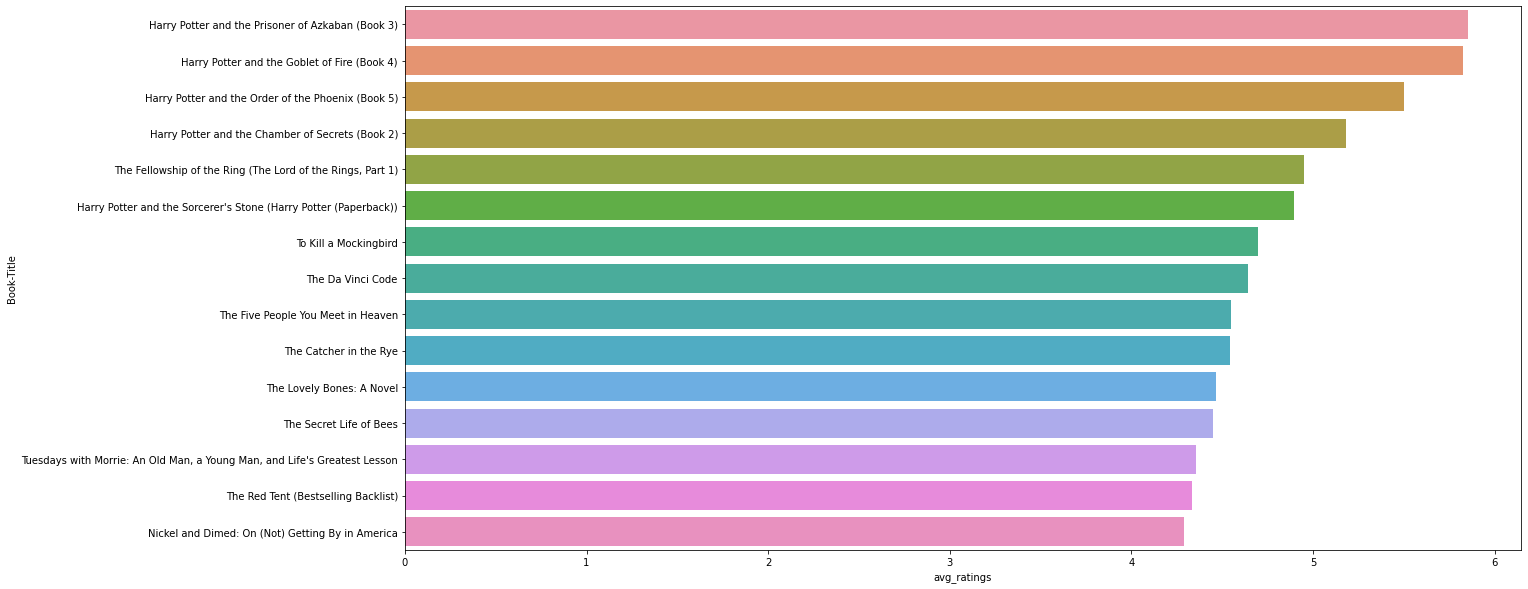

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=PopularBook['avg_ratings'].head(15),y=PopularBook['Book-Title'].head(15));

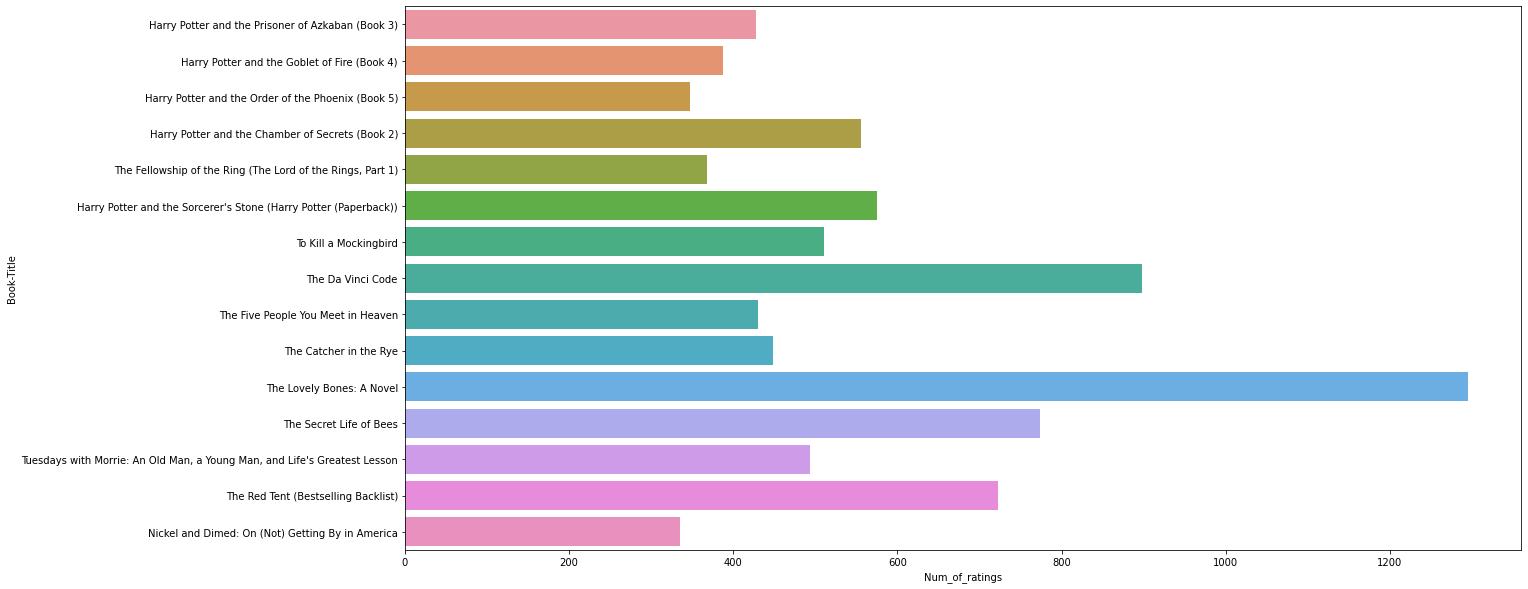

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x=PopularBook['Num_of_ratings'].head(15),y=PopularBook['Book-Title'].head(15));

In [29]:
books = pd.read_csv("../input/book-recommendation-dataset/Books.csv")
users = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
df=books.merge(ratings,how="left", on="ISBN")
df_=df.merge(users,how="left", on="User-ID")

df=df_.copy()
df.head()

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  \
0  http://images.amazon.com/images/P/0195153448.0...      2.0          0.0   
1  http://images.amazon.com/images/P/0002005018.0...      8.0          5.0   
2  http://images.amazon.com/images/P/0002005018.0...  11400.0          0.0   
3  http://images.amazon.com/images/P/0002005018.0...  11676.0          8.0   
4  http://images.amazon.com/images/P/0002005018.0...  41385.0          0.0   

                    Location   Age  
0  stockton, california, usa  18.0  
1   timmins, ontario, canada   NaN  
2    ottawa, ontario, canada  49.0  
3              n/a, n/a, n/a   NaN  
4   sudbury, ontario, canada   NaN

In [31]:
df.dropna(inplace=True)
df['Book-Rating'].fillna(0, inplace=True)

In [32]:
df['User-ID'] = df['User-ID'].astype('int')
df['Age'] = df['Age'].astype('int')
df["Book-Author"]=df["Book-Author"].astype("string")

In [33]:
df.drop(columns=["Image-URL-S","Image-URL-M", "Image-URL-L"],inplace=True)

In [34]:
book_amount = pd.DataFrame(df["Book-Title"].value_counts())
book_rare = book_amount[book_amount["Book-Title"] <= 100].index
book_common = df[~df["Book-Title"].isin(book_rare)]

In [35]:
user_book = book_common.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating").fillna(0)
user_book.head()

Book-Title  1984  1st to Die: A Novel  2nd Chance  4 Blondes  \
User-ID                                                        
42           0.0                  0.0         0.0        0.0   
44           0.0                  0.0         0.0        0.0   
51           0.0                  0.0         0.0        0.0   
67           0.0                  0.0         0.0        0.0   
75           0.0                  0.0         0.0        0.0   

Book-Title  A Bend in the Road  A Case of Need  \
User-ID                                          
42                         0.0             0.0   
44                         0.0             0.0   
51                         0.0             0.0   
67                         0.0             0.0   
75                         0.0             0.0   

Book-Title  A Child Called \It\": One Child's Courage to Survive"  \
User-ID                                                             
42                                                        0.0       
44                                                        0.0       
51                                                        0.0       
67                                                        0.0       
75                                                        0.0       

Book-Title  A Civil Action  A Fine Balance  \
User-ID                                      
42                     0.0             0.0   
44                     0.0             0.0   
51                     0.0             0.0   
67                     0.0             0.0   
75                     0.0             0.0   

Book-Title  A Heartbreaking Work of Staggering Genius  ...  Wild Animus  \
User-ID                                                ...                
42                                                0.0  ...          0.0   
44                                                0.0  ...          0.0   
51                                                0.0  ...          0.0   
67                                                0.0  ...          0.0   
75                                                0.0  ...          0.0   

Book-Title  Winter Moon  Winter Solstice  Wish You Well  Without Remorse  \
User-ID                                                                    
42                  0.0              0.0            0.0              0.0   
44                  0.0              0.0            0.0              0.0   
51                  0.0              0.0            0.0              0.0   
67                  0.0              0.0            0.0              0.0   
75                  0.0              0.0            0.0              0.0   

Book-Title  Wizard and Glass (The Dark Tower, Book 4)  Wuthering Heights  \
User-ID                                                                    
42                                                0.0                0.0   
44                                                0.0                0.0   
51                                                0.0                0.0   
67                                                0.0                0.0   
75                                                0.0                0.0   

Book-Title  Year of Wonders  \
User-ID                       
42                      0.0   
44                      0.0   
51                      0.0   
67                      0.0   
75                      0.0   

Book-Title  Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
User-ID                                                                         
42                                                        0.0                   
44                                                        0.0                   
51                                                        0.0                   
67                                                        0.0                   
75                                                        0.0                   

Book-Title  \O\

In [36]:
book_similarity_df = user_book.corr(method='pearson')
book_similarity_df.head()

Book-Title               1984  1st to Die: A Novel  2nd Chance  4 Blondes  \
Book-Title                                                                  
1984                 1.000000             0.015124   -0.005282  -0.002933   
1st to Die: A Novel  0.015124             1.000000    0.153185  -0.003248   
2nd Chance          -0.005282             0.153185    1.000000  -0.002608   
4 Blondes           -0.002933            -0.003248   -0.002608   1.000000   
A Bend in the Road   0.003248             0.035248    0.027283  -0.002591   

Book-Title           A Bend in the Road  A Case of Need  \
Book-Title                                                
1984                           0.003248        0.032600   
1st to Die: A Novel            0.035248        0.017095   
2nd Chance                     0.027283        0.023382   
4 Blondes                     -0.002591       -0.001942   
A Bend in the Road             1.000000        0.006645   

Book-Title           A Child Called \It\": One Child's Courage to Survive"  \
Book-Title                                                                   
1984                                                          0.013791       
1st to Die: A Novel                                           0.030503       
2nd Chance                                                   -0.004325       
4 Blondes                                                    -0.002402       
A Bend in the Road                                            0.016328       

Book-Title           A Civil Action  A Fine Balance  \
Book-Title                                            
1984                       0.015890        0.006777   
1st to Die: A Novel        0.033023        0.010784   
2nd Chance                 0.012407       -0.002678   
4 Blondes                 -0.001449       -0.001487   
A Bend in the Road        -0.002593        0.005516   

Book-Title           A Heartbreaking Work of Staggering Genius  ...  \
Book-Title                                                      ...   
1984                                                  0.023632  ...   
1st to Die: A Novel                                   0.022639  ...   
2nd Chance                                           -0.004434  ...   
4 Blondes                                             0.034648  ...   
A Bend in the Road                                    0.004471  ...   

Book-Title           Wild Animus  Winter Moon  Winter Solstice  Wish You Well  \
Book-Title                                                                      
1984                    0.005542    -0.002649         0.006663       0.008706   
1st to Die: A Novel    -0.004399    -0.002933         0.045677       0.028029   
2nd Chance              0.008911    -0.002355         0.022328       0.045365   
4 Blondes              -0.001909    -0.001308        -0.001639      -0.001906   
A Bend in the Road      0.010826    -0.002340         0.025993       0.018460   

Book-Title           Without Remorse  \
Book-Title                             
1984                       -0.003516   
1st to Die: A Novel         0.033099   
2nd Chance                 -0.003126   
4 Blondes                  -0.001736   
A Bend in the Road         -0.003106   

Book-Title           Wizard and Glass (The Dark Tower, Book 4)  \
Book-Title                                                       
1984                                                  0.039469   
1st to Die: A Novel                                   0.010953   
2nd Chance                                            0.036878   
4 Blondes                                             0.002468   
A Bend in the Road                                    0.004958   

Book-Title           Wuthering Heights  Year of Wonders  \
Book-Title                                                
1984                          0.000613         0.026430   
1st to Die: A Novel           0.017185         0.008515   
2nd Chance                   -0.003358        -0.003621   
4 Blonde

In [37]:
def get_similar_book(book_name, user_ratings):
  similar_score = book_similarity_df[book_name] * (user_ratings - 5)
  similar_score = similar_score.sort_values(ascending=False)

  return similar_score

In [38]:
guest = [
    ('A Man in Full', 9)
]

similar_books = pd.DataFrame()

for book, ratings in guest:
  similar_books = similar_books.append(get_similar_book(book, ratings))

similar_books.head()
recommendation_book = similar_books.sum().sort_values(ascending=False).head(10)
recommendation_book

A Man in Full                                                4.000000
A Thousand Acres (Ballantine Reader's Circle)                0.327341
The Blind Assassin                                           0.323214
House of Sand and Fog                                        0.306518
Pigs in Heaven                                               0.281806
I Know This Much Is True (Oprah's Book Club)                 0.245555
A Civil Action                                               0.229116
Midnight in the Garden of Good and Evil: A Savannah Story    0.225009
SHIPPING NEWS                                                0.221556
Middlesex: A Novel                                           0.217169
dtype: float64